# Supervised Learning Lab @ 2021
  ### Mohamed Ibn Khedher & Mounim A. El-Yacoubi

# Introduction
Classification of Handwritten Digits using Supervised Learning algorithms.
This study is carried out MNIST, a dataset of handwritten numerals made of up of 60000 for training and 10000 for test. Each image has a size of 28x28 pixels, the gray level of each being between 0 and 255.

Considered algorithms:

1. Support Vector Machine ([SVM](https://scikit-learn.org/stable/modules/svm.html))
2. Decision Tree ([DT](https://scikit-learn.org/stable/modules/tree.html))
3. Random Forest ([RF](https://scikit-learn.org/stable/modules/ensemble.html))
4. XGBoost ([XGB](https://xgboost.readthedocs.io/en/latest/python/index.html))
5. Linear Discriminant Analysis ([LDA](https://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html))
   


# Demo:

This Lab contains 6 parts. The goal is to compelete the TO DO parts.

1. Data reading and splitting.
2. Data visualisation.

For each classifier:

3. Define the classifier parameters
4. Fiting
5. Evaluation

After evaluation all classifiers:

6. Classifier performances comparaison


## Import the needed packages

In [ ]:
#### First, you should import libraires.
#### 

import keras
from keras.datasets import mnist
from IPython.display import Image 
import sklearn
import sklearn.tree
import sklearn.ensemble
import sklearn.discriminant_analysis

import xgboost
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
### for the color
import termcolor


# I) Data reading and splitting

This part consists of reading the MNIST dataset, split it into train and test sets and display the number of images per set.

In [ ]:
# I - Data reading & splitting

from keras.datasets import mnist

# 1) load data from MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data(
    path='mnist.npz'
)


# Input image format
rows, cols, channels = 28,28,1

# 2) What does "x_train", "y_train", "x_test" and "y_test" present ?
# 3) Reshape "x_train" and "x_test" according to the input image format

x_train = x_train.reshape(60000, rows*cols*channels)
x_test = x_test.reshape(10000,rows*cols*channels)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#4)Display the number of images in train and test sets

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



11501568/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


# II) Data visualisation 

Which library is required to visualise images?  
Complete the following commands to display the first 200 images from the training set.

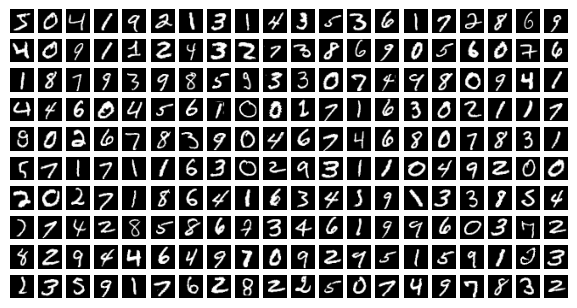

In [ ]:
# II - Data visualisation

#1) Which library is required to  display images
import matplotlib.pyplot as plt

#2) Complete the script to display the first 200 images from the MNIST dataset

plt.figure(figsize=(7.195, 3.841), dpi=100)

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(x_train[i].reshape([28,28]), cmap='gray')
    plt.axis('off')


# III) Decision Tree

In [ ]:
#1)  - Define the classifier parameters
##  max_depth is a hyper-parameter of the DecisionTree classifier
## max_depth int, default = None
## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
## until all leaves contain less than min_samples_split samples.
 
max_depth = 10

#2)  - Fitting

dtree = sklearn.tree.DecisionTreeClassifier(max_depth=max_depth)
dtree.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of Decision Tree = %.2f%%" %(dtree.score(x_test, y_test)*100))



Accuracy of Decision Tree = 86.60%


# IV) Random Forest

In [ ]:
#1)  - Define the classifier parameters
##  n_estimators is a hyper-parameter of the RandomForest classifier
## n_estimators int, default=100
## The number of trees in the forest.

n_estimators = 100

##  max_depth is a hyper-parameter of the DecisionTree classifier
## max_depth int, default = None
## The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or
## until all leaves contain less than min_samples_split samples.

max_depth = 10

#2)  - Fitting

rforest = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth)
rforest.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of Random Forest = %.2f%%" %(rforest.score(x_test, y_test)*100))


Accuracy of Random Forest = 94.62%


#V) XGBoost

In [ ]:
#1)  - Define the classifier parameters
##  max_depth is a hyper-parameter of the XGBoost classifier
## max_depth int, default = 6
## Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit.

max_depth = 10

#2)  - Fitting

xgb = xgboost.XGBClassifier(max_depth=max_depth)
xgb.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of XGBoost = %.2f%%" %(xgb.score(x_test, y_test)*100))


Accuracy of XGBoost = 97.28%


#VI) Support Vector Machine

In [ ]:
#1)  - Define the classifier parameters
##  kernel is a hyper-parameter of the SVM 
## kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
## Specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. 
## If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; 
## that matrix should be an array of shape (n_samples, n_samples).

kernel  = 'rbf'

#2)  - Fitting

model_svm = sklearn.svm.SVC(kernel=kernel)
model_svm.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of SVM = %.2f%%" %(model_svm.score(x_test, y_test)*100))


Accuracy of SVM = 97.92%


# VII) Linear Discriminant Analysis (LDA)

In [ ]:
#1)  - Define the classifier parameters
##  n_components is a hyper-parameter of the LDA 
## n_components : int, optional
## Number of components (< n_classes - 1) for dimensionality reduction.

n_components  = 50

#2)  - Fitting

model_lda = sklearn.discriminant_analysis.LinearDiscriminantAnalysis(n_components=n_components)
model_lda.fit(x_train, y_train)

#3)  - Evaluation

print("Accuracy of LDA = %.2f%%" %(model_lda.score(x_test, y_test)*100))

# VII) Comparaison of results

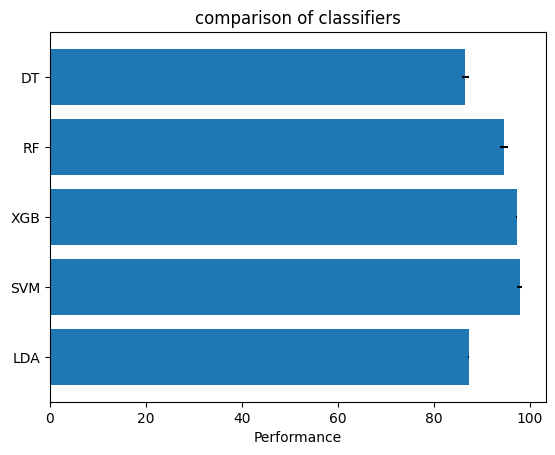

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
classifiers = ('DT', 'RF', 'XGB', 'SVM', 'LDA')
y_pos = np.arange(len(classifiers))
performance = [(dtree.score(x_test, y_test)*100),
               (rforest.score(x_test, y_test)*100),
               (xgb.score(x_test, y_test)*100),
               (model_svm.score(x_test, y_test)*100),
               (model_lda.score(x_test, y_test)*100)]

ax.barh(y_pos, performance,xerr=error, align='center')# xerr=error, 
ax.set_yticks(y_pos)
ax.set_yticklabels(classifiers)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('comparison of classifiers')

plt.show()

# VIII) Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix  
from sklearn.preprocessing import normalize
np.set_printoptions(precision=2, suppress=True)# Choose a classifier 

## DT is selected as example
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
y_predict = dtree.predict(x_test)
y_test_labels = y_test

#confusion matrix normalization
normed_confusion_matrix = normalize(confusion_matrix(y_test_labels,y_predict), axis=1, norm='l1')

print("Confusion Matrix\n")
for i in range(normed_confusion_matrix.shape[0]):
   print('[  ',end='')
   for j in range(normed_confusion_matrix.shape[1]):
     print("{:.2f}".format(normed_confusion_matrix[i][j]),end='')
     if (j<normed_confusion_matrix.shape[1]-1): print('\t  ',end='')
   print('  ]',end='')
   print('\n')


Confusion Matrix

[  0.93	  0.00	  0.01	  0.01	  0.01	  0.01	  0.01	  0.01	  0.01	  0.00  ]

[  0.00	  0.96	  0.01	  0.01	  0.00	  0.00	  0.00	  0.00	  0.01	  0.00  ]

[  0.01	  0.01	  0.84	  0.02	  0.02	  0.01	  0.01	  0.03	  0.03	  0.01  ]

[  0.01	  0.00	  0.04	  0.84	  0.01	  0.05	  0.00	  0.02	  0.02	  0.02  ]

[  0.00	  0.00	  0.01	  0.01	  0.85	  0.01	  0.01	  0.01	  0.03	  0.07  ]

[  0.02	  0.01	  0.00	  0.05	  0.01	  0.81	  0.02	  0.01	  0.03	  0.02  ]

[  0.03	  0.00	  0.02	  0.01	  0.03	  0.02	  0.87	  0.00	  0.02	  0.00  ]

[  0.00	  0.01	  0.02	  0.01	  0.01	  0.00	  0.00	  0.88	  0.01	  0.04  ]

[  0.01	  0.01	  0.03	  0.04	  0.02	  0.03	  0.02	  0.01	  0.81	  0.03  ]

[  0.01	  0.00	  0.01	  0.03	  0.02	  0.01	  0.00	  0.01	  0.03	  0.86  ]

